In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('data1_all.csv')
data

,Name,Weight,Length,Diagonal,Height,Width
0,A,242.0,25.4,30.0,11.5200,4.0200
1,A,290.0,26.3,31.2,12.4800,4.3056
2,A,340.0,26.5,31.1,12.3778,4.6961
3,A,363.0,29.0,33.5,12.7300,4.4555
4,A,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,G,12.2,12.2,13.4,2.0904,1.3936
155,G,13.4,12.4,13.5,2.4300,1.2690
156,G,12.2,13.0,13.8,2.2770,1.2558
157,G,19.7,14.3,15.2,2.8728,2.0672


1. data 수집

In [2]:
data_X=data[['Weight','Length','Diagonal','Height','Width']].to_numpy()
data_Y=data[['Name']].to_numpy()

2. data 전처리

In [3]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(data_X)
s_data_x=ss.transform(data_X)

3. 입력data정리

In [4]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y= train_test_split(s_data_x,data_Y,random_state=42)

4. 모델 생성 및 학습

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(t_x,t_y)
kn.classes_ #7개의 범주로 나뉘어져있음 name이 A부터 G까지 있음

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

5. 검증

In [6]:
kn.score(t_x,t_y),kn.score(tt_x,tt_y)

(0.8823529411764706, 0.85)

In [7]:
kn.predict(tt_x[:4]) #일부만

array(['E', 'G', 'F', 'E'], dtype=object)

In [8]:
tt_y[:4] #실제값범주와 예측값범주가 조금 다름 (스코어 값처럼)

array([['E'],
       ['G'],
       ['F'],
       ['C']], dtype=object)

In [9]:
print(np.around(kn.predict_proba(tt_x[:4]),decimals=3)) #decimals=3 소수점3자리까지, 각 예측의 확률 분포

[[0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.333 0.    0.    0.667 0.    0.   ]]


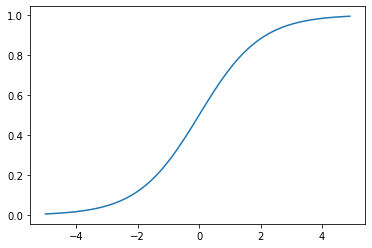

In [10]:
#시드모이드 함수
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)
h=1/(1+np.exp(-z)) #
plt.plot(z,h)

In [11]:
#ex
n_l=np.array(['a','b','c'])
n_l[[True,False,True]] #참인 부분만 출력

array(['a', 'c'], dtype='<U1')

In [12]:
data=pd.read_csv('data2.csv')
data_X=data[['Weight','Length','Diagonal','Height','Width']].to_numpy()
data_Y=data[['Name']].to_numpy()
data

,Name,Weight,Length,Diagonal,Height,Width
0,A,242.0,25.4,30.0,11.5200,4.0200
1,A,290.0,26.3,31.2,12.4800,4.3056
2,A,340.0,26.5,31.1,12.3778,4.6961
3,A,363.0,29.0,33.5,12.7300,4.4555
4,A,430.0,29.0,34.0,12.4440,5.1340
5,A,450.0,29.7,34.7,13.6024,4.9274
6,A,500.0,29.7,34.5,14.1795,5.2785
7,A,390.0,30.0,35.0,12.6700,4.6900
8,A,450.0,30.0,35.1,14.0049,4.8438
9,A,500.0,30.7,36.2,14.2266,4.9594


In [13]:
t_x,tt_x,t_y,tt_y= train_test_split(data_X,data_Y,random_state=42)
ss=StandardScaler().fit(t_x)
t_x=ss.transform(t_x)
tt_x=ss.transform(tt_x)
from sklearn.linear_model import LogisticRegression #LogisticRegression 로지스틱회귀공식
lr =LogisticRegression()
lr.fit(t_x,t_y)
print(lr.predict(tt_x[:5]),tt_y[:5],sep='\n')
print(lr.predict_proba(tt_x[:5]))

['A' 'G' 'G' 'G' 'A']
[['A']
 ['G']
 ['G']
 ['G']
 ['A']]
[[0.98163821 0.01836179]
 [0.04989333 0.95010667]
 [0.09300169 0.90699831]
 [0.04894275 0.95105725]
 [0.99316044 0.00683956]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
print(lr.coef_)
print(lr.intercept_)

[[-0.57548931 -0.79284742 -0.82598773 -0.86627132 -0.82254687]]
[-2.38253807]
